In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import imutils

In [2]:
img = cv2.imread(r'../Storage/flowers_for_petals/2/image_05146.jpg',-1)

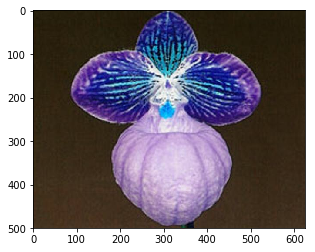

In [3]:
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RGB 11,30,37  , HSI 195.0791379176578,0.5769230769230769,0.10196078431372547


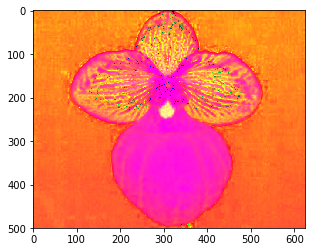

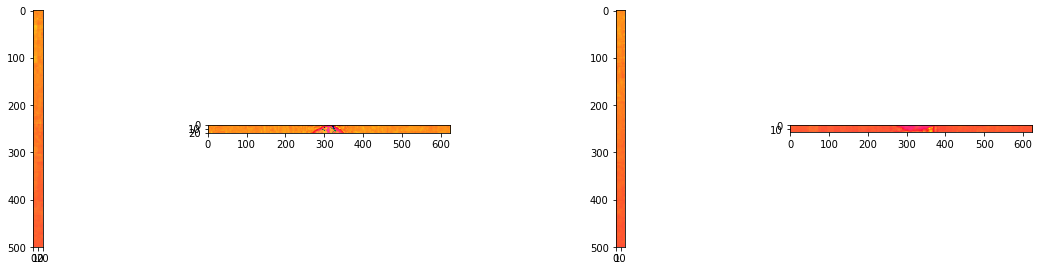

In [4]:
#BGR to HSI
normalized_img = np.zeros(img.shape).astype(float)
normalized_img = cv2.normalize(img.astype(float),normalized_img,0,1,cv2.NORM_MINMAX)
img_converted = np.zeros_like(img,dtype='float')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        H = 0
        S = 0
        I = 0
        R = float(normalized_img[i][j][2])
        G = float(normalized_img[i][j][1])
        B = float(normalized_img[i][j][0])
        RGB_sum = R + G + B
        RGB_min = min(R, G, B)
        #print("{} ,{} ,{} , {} , {}".format(R,G,B,RGB_min,RGB_sum))
        I = (1/3) * RGB_sum
        if R == G and G == B:
            H = 0
            S = 0
        else:
            S = 1 - ((3*RGB_min)/RGB_sum)
            if S > 0.9999:
                S = 1
            if S < 0.00001:
                S = 0
                H = 0
            else:
                dividend = (1/2) * ((R-G) + (R-B))
                divisor = math.sqrt(math.pow((R-G),2) + (R-B)*(G-B))
                w = dividend/divisor
                if w > 1:
                    w=1
                elif w < -1:
                    w = -1                    
                H = math.acos(w)
                if B > G:
                    H = (2*math.pi) - H
        img_converted[i][j][0] = H * (180 / math.pi)
        img_converted[i][j][1] = S
        img_converted[i][j][2] = I

plt.imshow(img_converted)
print("RGB {},{},{}  , HSI {},{},{}".format(img[0][0][2],img[0][0][1],img[0][0][0],img_converted[0][0][0]
                                           ,img_converted[0][0][1],img_converted[0][0][2]))
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(4,4,1)
plt.imshow(img_converted[0:,0:20])
ax = fig.add_subplot(4,4,2)
plt.imshow(img_converted[0:20,0:])
ax = fig.add_subplot(4,4,3)
plt.imshow(img_converted[0:,-20:-1])
ax = fig.add_subplot(4,4,4)
plt.imshow(img_converted[-20:-1,0:])

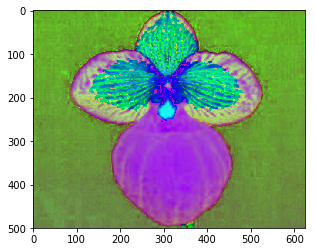

In [5]:
HSV_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(HSV_img)

(array([ 3016.,  3259.,  3750.,  3044.,  2774.,  2502.,  2223.,  1744.,
         1769.,  1433.,  1289.,  1405.,  1155.,  1317.,  1162.,  1264.,
         1094.,  1149.,  1104.,  1330.,  1327.,  1247.,  1277.,  1178.,
         1066.,  1048.,   842.,   823.,   752.,   795.,  1071.,  1142.,
         1480.,  2313.,  4181.,  6391.,  8428.,  9073.,  8695.,  7695.,
         7259.,  7004.,  6300.,  5643.,  5327.,  5268.,  5745.,  5543.,
         5810.,  6704.,  6740.,  7175.,  7288.,  6553.,  6324.,  6107.,
         5603.,  5668.,  5681.,  5764.,  5743.,  5820.,  5717.,  6098.,
         5975.,  5760.,  5550.,  4684.,  3854.,  3563.,  3329.,  2777.,
         2307.,  1846.,  1650.,  1547.,  1277.,  1098.,  1021.,   870.,
          945.,   898.,   883.,   924.,   835.,   883.,   772.,   822.,
          811.,   791.,  1006.,  1098.,   833.,  1006.,  1143.,  2844.,
         1401.,  4388., 20054.,  6319., 12523., 25417., 20976., 36588.,
         5742., 42509.,  4004.,  6660.,  3134.,  1758.,  1347., 

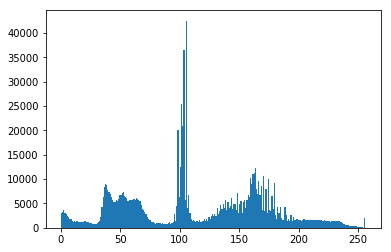

In [6]:
plt.hist(HSV_img.ravel(),256,[0,256])

In [7]:
def Remove_Freq_Values(original_image,filter_size,ratio):
    new_image = np.zeros_like(original_image)
    most_freq = []
    #cv2.calcHist(images, channels, mask, bins, ranges)
    mask = np.zeros(original_image.shape[:2],np.uint8)
    mask[0:,0:filter_size] = 1
    hist = cv2.calcHist([original_image],[0],mask,[256],[0,256])
    for i in range(hist.shape[0]):
        if hist[i][0] >= hist[hist.argmax()][0]/ratio:
            most_freq.append(i)
    
    mask[0:,-filter_size:-1] = 1
    hist = cv2.calcHist([original_image],[0],mask,[256],[0,256])
    mask = np.zeros(original_image.shape[:2],np.uint8)
    for i in range(hist.shape[0]):
        if hist[i][0] >= hist[hist.argmax()][0]/ratio:
            most_freq.append(i)
    
    mask = np.zeros(original_image.shape[:2],np.uint8)
    mask[0:filter_size,0:] = 1
    hist = cv2.calcHist([original_image],[0],mask,[256],[0,256])
    for i in range(hist.shape[0]):
        if hist[i][0] >= hist[hist.argmax()][0]/ratio:
            most_freq.append(i)
    
    mask = np.zeros(original_image.shape[:2],np.uint8)
    mask[-filter_size:-1,0:] = 1
    hist = cv2.calcHist([original_image],[0],mask,[256],[0,256])
    for i in range(hist.shape[0]):
        if hist[i][0] >= hist[hist.argmax()][0]/ratio:
            most_freq.append(i)
    
    #most_freq_ratio = hist[hist.argmax()] / hist.sum()
    print(most_freq)
    for i in range(original_image.shape[0]):
        for j in range(original_image.shape[1]):
            #if hist[original_image[i][j][0]]/hist.sum() < (most_freq_ratio/ratio) and original_hist[original_image[i][j][0]]/original_hist.sum() < 0.05:
            if original_image[i][j][0] not in most_freq:
                new_image[i][j][0] = original_image[i][j][0]
                new_image[i][j][1] = original_image[i][j][1]
                new_image[i][j][2] = original_image[i][j][2]
    if cv2.compare(new_image,original_image,0).all():
        print("Nothing Changed")
    #original_hist = cv2.calcHist([original_image],[0],None,[256],[0,256])
    return new_image

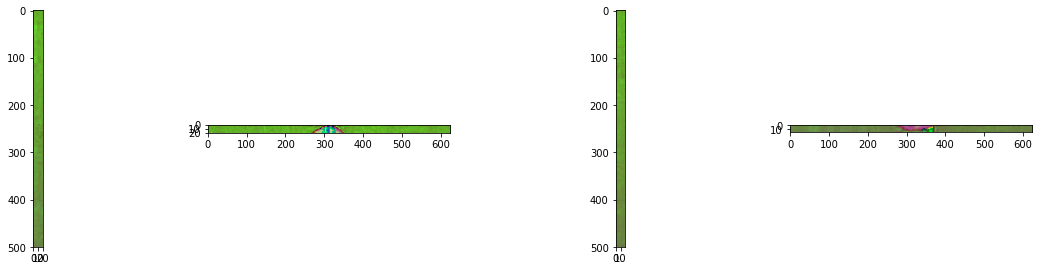

In [8]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(4,4,1)
plt.imshow(HSV_img[0:,0:20])
ax = fig.add_subplot(4,4,2)
plt.imshow(HSV_img[0:20,0:])
ax = fig.add_subplot(4,4,3)
plt.imshow(HSV_img[0:,-20:-1])
ax = fig.add_subplot(4,4,4)
plt.imshow(HSV_img[-20:-1,0:])

[98, 101, 102, 103, 98, 101, 102, 103, 105, 98, 99, 100, 105]
[0, 0, 0, 0]
[0, 0, 0, 0]
Nothing Changed
[0, 0, 0, 0]
Nothing Changed


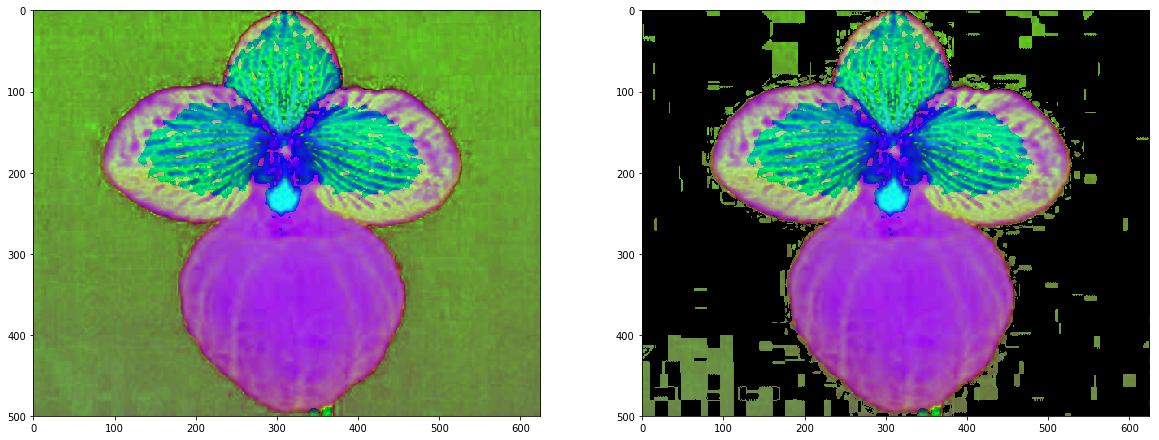

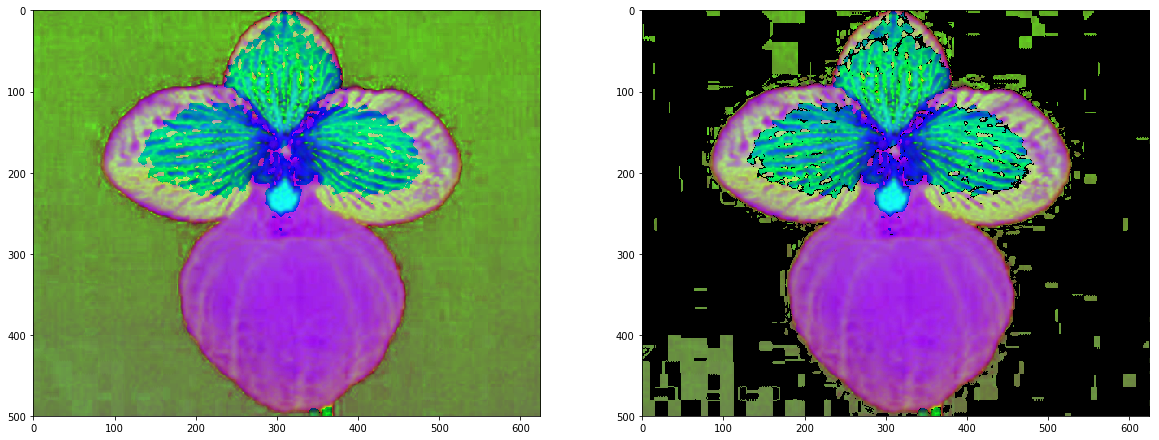

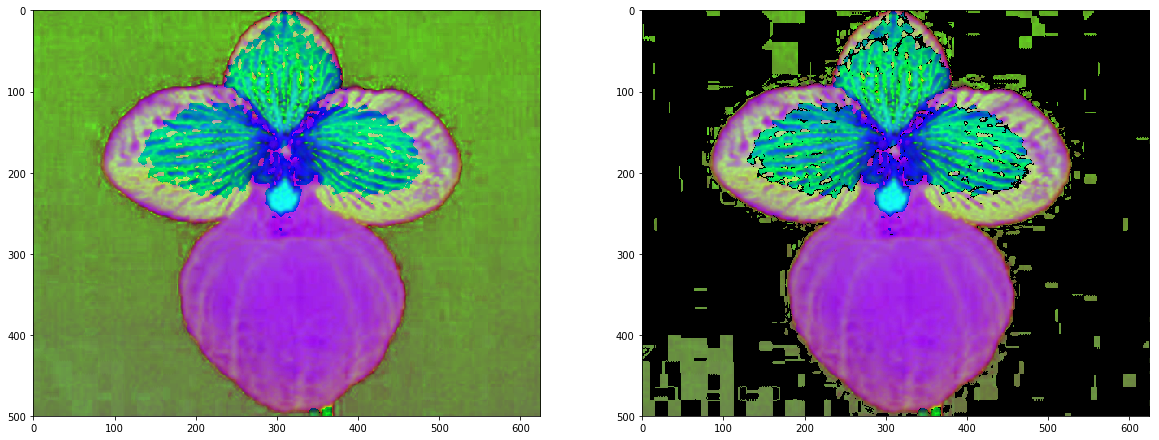

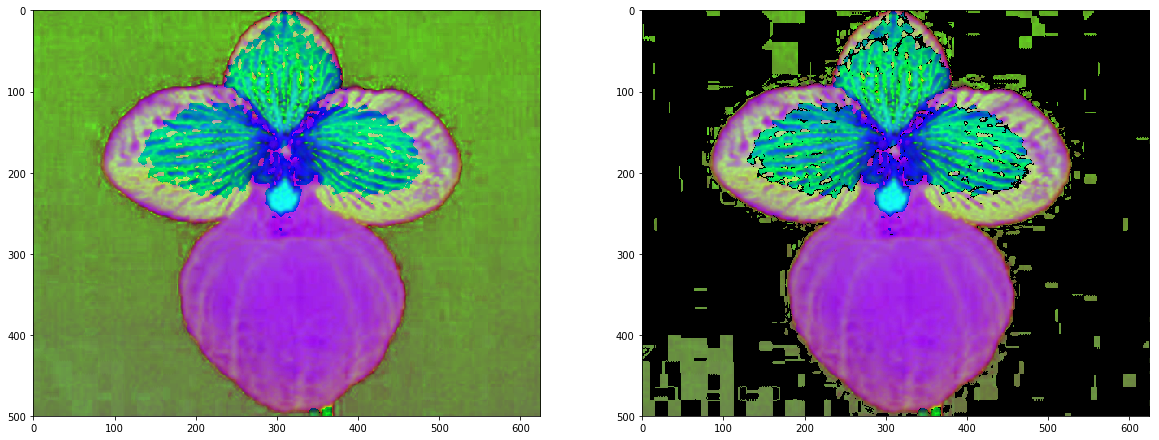

In [9]:
filterd_HSV_filter = np.zeros_like(HSV_img)
filterd_HSV_filter = cv2.normalize(HSV_img,filterd_HSV_filter,0,255,cv2.NORM_MINMAX)
filter_size = 35
for i in range(4):
    ratio = 4
    mask = np.zeros(HSV_img.shape[:2],np.uint8)
    mask[0:,0:filter_size] = 1
    mask[0:,-filter_size:-1] = 1
    mask[0:filter_size,0:] = 1
    mask[-filter_size:-1,0:] = 1
    filterd_HSV_filter = Remove_Freq_Values(filterd_HSV_filter,filter_size,ratio)
    #plt.imshow(filterd_HSV_filter_1)
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(2,2,1)
    plt.imshow(HSV_img)
    ax = fig.add_subplot(2,2,2)
    plt.imshow(filterd_HSV_filter)
    filter_size += 5
    ratio += 4

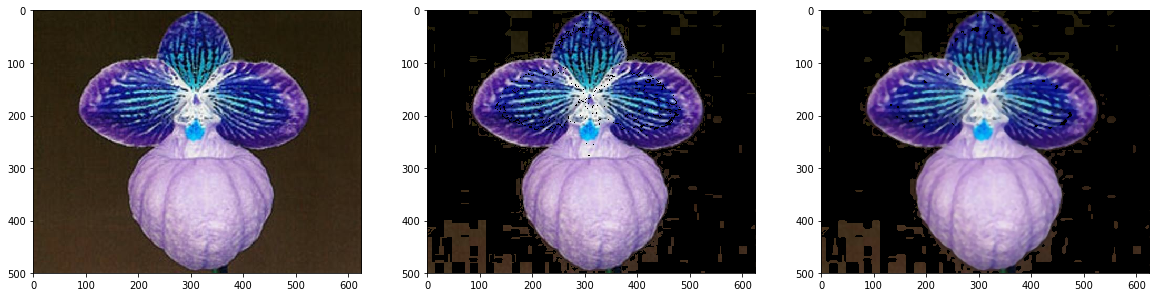

In [10]:
new_img = cv2.cvtColor(filterd_HSV_filter,cv2.COLOR_HSV2BGR)
new_img2 = cv2.medianBlur(new_img,5)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,3,1)
plt.imshow(img)
ax = fig.add_subplot(1,3,2)
plt.imshow(new_img)
ax = fig.add_subplot(1,3,3)
plt.imshow(new_img2)

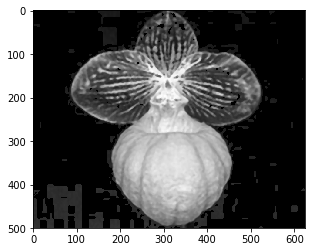

In [11]:
gray = cv2.cvtColor(new_img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

In [28]:
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV) #cv2.threshold(gray,90,255,cv2.THRESH_BINARY_INV)

127.0


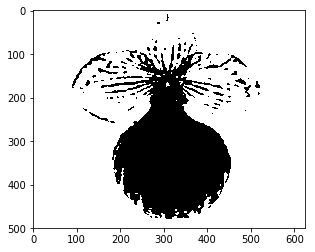

In [29]:
print(ret)
plt.imshow(thresh, cmap='gray')
plt.show()

In [30]:
def distance(x1, y1, x2, y2):
    length = math.sqrt(abs((x1 - x2))**2 + abs((y1 - y2))**2)
    return length

In [31]:
def intersection(line1, line2):
    """Finds the intersection of two lines given in Hesse normal form.

    Returns closest integer pixel locations.
    See https://stackoverflow.com/a/383527/5087436
    """
    rho1, theta1 = line1[0]
    rho2, theta2 = line2[0]
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    x0, y0 = int(np.round(x0)), int(np.round(y0))
    return x0, y0

Number of Contours 134
[[[320  80]]

 [[321  79]]

 [[323  79]]

 ...

 [[319  98]]

 [[319  84]]

 [[320  83]]]
Height 302, Width 402, Area 64048.5, extLeft: (155, 177), extRight: (456, 347), extTop: (321, 79), extBot: (318, 480), Line1: Line2D(),         Line2: Line2D(), circle_area: 125663.70614359173, ellipse_area: 307891.8330731142, rect_area: 121404
Side 1: 111.19802156513397, Side 2: 291.2181313036673, Side 3: 242.99794237811975
Triangle Area: 12847.894718030151, Contour Area: 64048.5, petals: 9


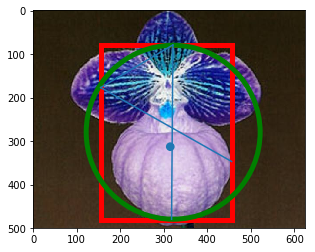

In [34]:
import matplotlib.lines as mlines
import math
img1 = cv2.imread(r'../Storage/flowers_for_petals/2/image_05146.jpg',-1)
cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
print("Number of Contours {0}".format(len(cnts)))

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img1)

count = 1
for c in cnts:
    # compute the bounding box of the contour and use the
    # bounding box to compute the aspect ratio
    
    #if count == 2:
    (x, y, w, h) = cv2.boundingRect(c)
    if ((h > 300 and w > 300) and (h < img1.shape[0] and w < img1.shape[1])):
        print(c)
        contour_area = cv2.contourArea(c)
        rect_area = w * h
        
        
        rect = patches.Rectangle((x,y),w,h,linewidth=5,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        
        (min_cx,min_cy),radius = cv2.minEnclosingCircle(c)
        center = (int(min_cx),int(min_cy))
        radius = int(radius)
        circle = patches.Circle((min_cx, min_cy), radius=radius, linewidth=5, edgecolor='g',facecolor='none')
        ax.add_patch(circle)
        circle_area = math.pi * radius * radius
        
        (x, y), (MA, ma), angle = cv2.fitEllipse(c)
        ellipse_area = math.pi * MA * ma
        
        # determine the most extreme points along the contour
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])
        
        line1 = mlines.Line2D([extLeft[0],extRight[0]], [extLeft[1],extRight[1]])
        line2 = mlines.Line2D([extTop[0],extBot[0]], [extTop[1],extBot[1]])
        line3 = mlines.Line2D([extLeft[0], extTop[0]], [extLeft[1], extTop[1]])
        str_data = "Height {0}, Width {1}, Area {2}, extLeft: {3}, extRight: {4}, extTop: {5}, extBot: {6}, Line1: {7}, \
        Line2: {8}, circle_area: {9}, ellipse_area: {10}, rect_area: {11}".format(w, h, contour_area, extLeft, extRight, extTop, extBot, line1, line2, \
                                             circle_area, ellipse_area, rect_area)
        print(str_data)
        ax.add_line(line1)
        ax.add_line(line2)
        ax.add_line(line3)
        
        side1 = distance(extLeft[0],extRight[0], extLeft[1], extRight[1])
        side2 = distance(extTop[0],extBot[0], extTop[1], extBot[1])
        side3 = distance(extLeft[0], extTop[0], extLeft[1], extTop[1])
        str_side = "Side 1: {0}, Side 2: {1}, Side 3: {2}".format(side1, side2, side3)
        print(str_side)
        semi_perimeter = (side1 + side2 + side3)//2
        area = math.sqrt(semi_perimeter*(semi_perimeter-side1)*(semi_perimeter-side2)*(semi_perimeter-side3))
        
        M = cv2.moments(c)
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        center_circle = plt.Circle((cx, cy), 10)
        ax.add_patch(center_circle)
                
        petals = math.ceil((rect_area *0.85)/area)
        print("Triangle Area: {0}, Contour Area: {1}, petals: {2}".format(area, contour_area, petals))
        
    count = count + 1
    
    
plt.show()